This is the template for reducing dimension to display clusters after applying Kmeans

Silhouette Score: 0.429


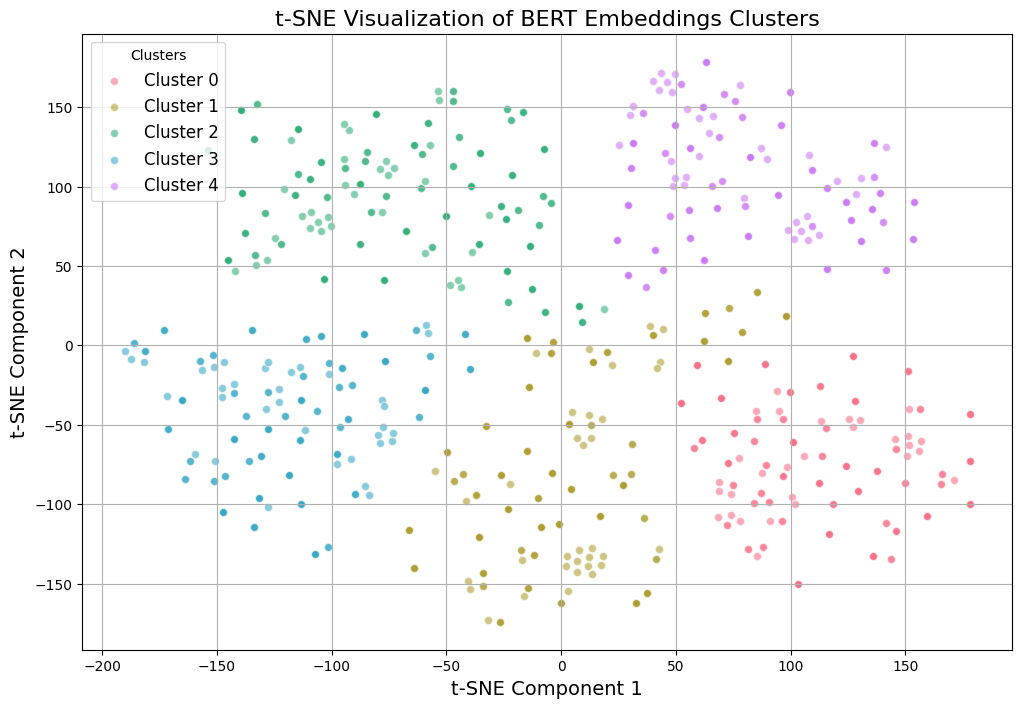

In [1]:
#template for visualization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns  # For better color palettes

# Load your BERT embeddings data
df = pd.read_csv(r'D:\CODING\Project\NVIDIA Stock prediction\data\synthesis\embedding\BERT_EmbeddingText.csv')
df1 = pd.read_csv(r'D:\CODING\Project\NVIDIA Stock prediction\data\synthesis\data.csv')
data = df.drop('timestamp', axis=1)

# Standardize the data
data = pd.DataFrame(StandardScaler().fit_transform(data))

# Perform K-Means clustering
n_clusters = 5  # Set the number of clusters
model = KMeans(n_clusters=n_clusters, random_state=42)
model.fit(data)

# Calculate silhouette score
silhouette_avg = silhouette_score(data, model.labels_)
print(f'Silhouette Score: {silhouette_avg:.3f}')

# Add cluster labels to the original DataFrame
new_data = pd.DataFrame()
new_data['Cluster'] = model.labels_
new_data['timestamp'] = df['timestamp']
new_data['keyword'] = df1['keyword']
new_data.to_csv(r'D:\CODING\Project\NVIDIA Stock prediction\data\synthesis\classification\BERT_EmbeddingText_classification.csv', index=False)

# Dimensionality reduction for visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data)

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['Component 1', 'Component 2'])
tsne_df['Cluster'] = new_data['Cluster']

# Create a color palette
palette = sns.color_palette("husl", n_clusters)  # Generates a palette with distinct colors

# Create a scatter plot with different colors for each cluster
plt.figure(figsize=(12, 8))
for cluster in range(n_clusters):
    subset = tsne_df[tsne_df['Cluster'] == cluster]
    plt.scatter(subset['Component 1'], subset['Component 2'],
                label=f'Cluster {cluster}',
                color=palette[cluster],  # Unique color for each cluster
                alpha=0.6,
                edgecolor='w')  # Optional: white edge color for better visibility

# Customize the plot
plt.title('t-SNE Visualization of BERT Embeddings Clusters', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.legend(title='Clusters', fontsize=12)
plt.grid(True)
plt.show()
